In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import time
import os
import copy
#from torchvision.models.resnet import ResNet

plt.ion()

In [0]:
# for normalizing grayscale images, change the mean and std tuples from 
# (a,b,c) to (a,). If (a) instead, the program will think that the tensor
# dimension is zero
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

trainset = FashionMNIST(root='./data', train=True, 
                                             download=True, transform=transform)

trainset, valset = random_split(trainset, (50000,10000))

trainloader = DataLoader(trainset, batch_size=4, shuffle=True, 
                                          num_workers=4)

testset = FashionMNIST(root='./data', train=False, 
                                            download=True,transform=transform)

testloader = DataLoader(testset, batch_size=4, shuffle=False, 
                                         num_workers=4)

valloader = DataLoader(valset, batch_size=4, shuffle=False, 
                                         num_workers=4)

classes= ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(nn.Linear(784,120),nn.ReLU(), 
                                nn.Linear(120, 84), nn.ReLU(), 
                                nn.Linear(84, 10))

    def forward(self, x):
        x = x.view(-1, 1 * 28 * 28)
        x = self.fc(x)
        return x


net = Net().to(device)

In [0]:
image_datasets = {'train': trainset, 'val': valset, 'test': testset}
dataloaders = {'train': trainloader, 'val': valloader, 'test': testloader}
dataset_sizes = {'train': len(trainset), 'val': len(valset), 'test': testloader}

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=15):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    PhaseAcc = {'train': train_acc, 'val': val_acc}
    PhaseLoss = {'train': train_loss, 'val': val_loss}
    
    for epoch in range(num_epochs):
        print('Epoch{}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train() # Set model to training mode
            else:
                model.eval() # Set model to evaluation mode
            
            running_loss = 0.0
            running_corrects = 0
            
            # iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # zero the parameter gradients
                optimizer.zero_grad()
                
                
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _,preds = torch.max(outputs,1)
                    loss = criterion(outputs, labels)
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            PhaseAcc[phase].append(epoch_acc)
            PhaseLoss[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            # deep copy the model 
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
        
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
model = net

criterion = nn.CrossEntropyLoss()

#optimizer SGD.
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

num_epochs = 5

In [7]:
model_conv = train_model(model_conv, criterion, optimizer_conv, 
                         exp_lr_scheduler, num_epochs=15)

Epoch0/14
----------
train Loss: 0.5517 Acc: 0.7966
val Loss: 0.4147 Acc: 0.8472

Epoch1/14
----------
train Loss: 0.4019 Acc: 0.8524
val Loss: 0.3832 Acc: 0.8599

Epoch2/14
----------
train Loss: 0.3599 Acc: 0.8677
val Loss: 0.3609 Acc: 0.8662

Epoch3/14
----------
train Loss: 0.3310 Acc: 0.8789
val Loss: 0.3866 Acc: 0.8571

Epoch4/14
----------
train Loss: 0.3130 Acc: 0.8848
val Loss: 0.3238 Acc: 0.8820

Epoch5/14
----------
train Loss: 0.2959 Acc: 0.8894
val Loss: 0.3178 Acc: 0.8795

Epoch6/14
----------
train Loss: 0.2381 Acc: 0.9120
val Loss: 0.2848 Acc: 0.8944

Epoch7/14
----------
train Loss: 0.2288 Acc: 0.9152
val Loss: 0.2851 Acc: 0.8943

Epoch8/14
----------
train Loss: 0.2248 Acc: 0.9170
val Loss: 0.2821 Acc: 0.8964

Epoch9/14
----------
train Loss: 0.2211 Acc: 0.9190
val Loss: 0.2821 Acc: 0.8963

Epoch10/14
----------
train Loss: 0.2180 Acc: 0.9197
val Loss: 0.2812 Acc: 0.8967

Epoch11/14
----------
train Loss: 0.2150 Acc: 0.9221
val Loss: 0.2810 Acc: 0.8970

Epoch12/14
---

In [12]:
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    PhaseAcc = {'train': train_acc, 'val': val_acc}
    PhaseLoss = {'train': train_loss, 'val': val_loss}
    
    for epoch in range(num_epochs):
        print('Epoch{}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train() # Set model to training mode
            else:
                model.eval() # Set model to evaluation mode
            
            running_loss = 0.0
            running_corrects = 0
            
            # iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # zero the parameter gradients
                optimizer.zero_grad()
                
                
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _,preds = torch.max(outputs,1)
                    loss = criterion(outputs, labels)
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            PhaseAcc[phase].append(epoch_acc)
            PhaseLoss[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            # deep copy the model 
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
        
    # load best model weights
    model.load_state_dict(best_model_wts)

Epoch0/4
----------
train Loss: 0.2744 Acc: 0.8978
val Loss: 0.3376 Acc: 0.8791

Epoch1/4
----------
train Loss: 0.2610 Acc: 0.9029
val Loss: 0.3036 Acc: 0.8903

Epoch2/4
----------
train Loss: 0.2527 Acc: 0.9057
val Loss: 0.3159 Acc: 0.8850

Epoch3/4
----------
train Loss: 0.2414 Acc: 0.9102
val Loss: 0.3319 Acc: 0.8764

Epoch4/4
----------
train Loss: 0.2350 Acc: 0.9126
val Loss: 0.3030 Acc: 0.8894

Training complete in 3m 39s
Best val Acc: 0.890300


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

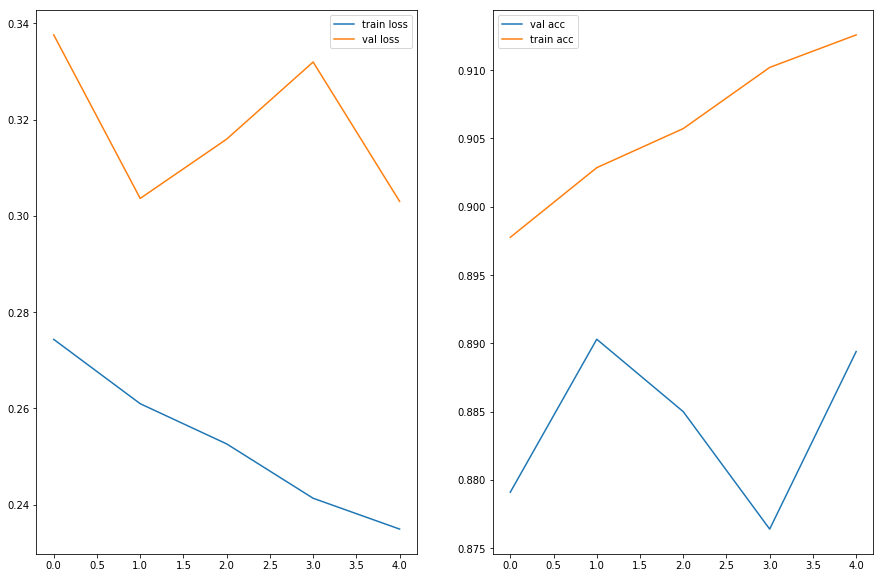

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.plot(train_loss, label='train loss')
ax1.plot(val_loss, label='val loss')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

ax2.plot(val_acc, label='val acc')
ax2.plot(train_acc, label='train acc')
ax2.legend()